The following script will iterate through all of the data and process it into a single dataframe.

The following are imports that will be used to process the data.

In [63]:
import json
import pandas as pd
from attr import asdict

The following class declaration will be used to process the data. The class will be used to create an array of Cuboid objects. The cadcd_mappings dictionary will be used to dictate the location of the data in the dataframe.

In [55]:
class Cuboid:
    def __init__(self, position, dimensions, yaw, stationary, uuid, label, camera_used, attributes, points_count) -> None:
        self.attributes = attributes
        self.position = position
        self.dimensions = dimensions
        self.yaw = yaw
        self.stationary = stationary
        self.uuid = uuid
        self.label = label
        self.camera_used = camera_used
        self.points_count = points_count
        pass

    def to_dict(self):
        return {
            "attributes": self.attributes,
            "position": self.position,
            "dimensions": self.dimensions,
            "yaw": self.yaw,
            "stationary": self.stationary,
            "uuid": self.uuid,
            "label": self.label,
            "camera_used": self.camera_used,
            "points_count": self.points_count
        }
        

cadcd_mappings = {
    '2018_03_06': [
        '0001', '0002', '0005', '0006', '0008', '0009', '0010',
        '0012', '0013', '0015', '0016', '0018'
    ],
    '2018_03_07': [
        '0001', '0002', '0004', '0005', '0006', '0007'
    ],
    '2019_02_27': [
        '0002', '0003', '0004', '0005', '0006', '0008', '0009', '0010',
        '0011', '0013', '0015', '0016', '0018', '0019', '0020',
        '0022', '0024', '0025', '0027', '0028', '0030',
        '0031', '0033', '0034', '0035', '0037', '0039', '0040',
        '0041', '0043', '0044', '0045', '0046', '0047', '0049', '0050',
        '0051', '0054', '0055', '0056', '0058', '0059',
        '0060', '0061', '0063', '0065', '0066', '0068', '0070',
        '0072', '0073', '0075', '0076', '0078', '0079',
        '0080', '0082'
    ]
}

In [62]:
data = []
for date in cadcd_mappings:
    for folder in cadcd_mappings[date]:
        file_name = 'data_labels/' + date + '/' + folder + '/3d_ann.json'
        with open(file_name) as f:
            file = json.load(f)
            for obj in file:
                for cuboid in obj['cuboids']:
                    cuboid_data = Cuboid(
                        position=cuboid['position'],
                        dimensions=cuboid['dimensions'],
                        yaw=cuboid['yaw'],
                        stationary=cuboid['stationary'],
                        uuid=cuboid['uuid'],
                        label=cuboid['label'],
                        camera_used=cuboid['camera_used'],
                        attributes=cuboid['attributes'],
                        points_count=cuboid['points_count']
                    )
                    data.append(cuboid_data.to_dict())

df = pd.DataFrame(data)

The next selection will convert the data array to a dataframe.

In [64]:
print(df.head())

                                        attributes  \
0  {'state': 'Moving', 'truck_type': 'Semi_Truck'}   
1                              {'state': 'Parked'}   
2                              {'state': 'Parked'}   
3                              {'state': 'Parked'}   
4                              {'state': 'Parked'}   

                                            position  \
0  {'x': -19.10966344067156, 'y': -0.999419663041...   
1  {'x': -9.376033925950999, 'y': 32.674561948543...   
2  {'x': -17.99813181674196, 'y': 32.520451432452...   
3  {'x': -20.74955000411461, 'y': 31.849314886451...   
4  {'x': -23.84984491618181, 'y': 31.495139580804...   

                             dimensions       yaw  stationary  \
0  {'x': 2.609, 'y': 21.222, 'z': 4.31}  0.247595       False   
1  {'x': 1.648, 'y': 4.352, 'z': 1.451} -1.554317        True   
2  {'x': 1.805, 'y': 4.589, 'z': 1.879}  1.622184        True   
3  {'x': 1.879, 'y': 4.589, 'z': 1.783} -1.449587        True   
4  {'x': 1.95

The following block of code will import libraries to process the data.

In [58]:
from matplotlib import pyplot as plt
import numpy as np

The following code block will plot the vehicle type distribution.

AttributeError: 'dict' object has no attribute 'label'

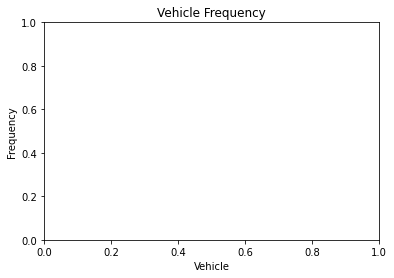

In [59]:
plt.xlabel('Vehicle')
plt.ylabel('Frequency')
plt.title('Vehicle Frequency')
# create a histogram showing the distribution of vehicles
plt.hist([cuboid.label for cuboid in data], bins=np.arange(0, 10, 1))